In [1]:
#!pip install threadpoolctl==3.5.0 # if you encounter threadpoolctl error # https://stackoverflow.com/questions/71352354/sklearn-kmeans-is-not-working-as-i-only-get-nonetype-object-has-no-attribute
# use at least pytorch 2.3.0
import random
from clustering.utils.constants import *
from clustering.utils.utils import *
from clustering.server import Server
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

In [2]:
class_set_list = [[1,2],[3,4],[5,6],[7,8],[9,0]]

tasks_data_info, tasks_data_idx = get_experiment_data(class_set_list)

/Users/haoranzhang/Downloads/FL-cluster-sampling/utility/dataset.py:101: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(dataset.targets)


### note: I haven't changed the cosine method yet
##### available methods:
- data type: gradient_norms, weights, gradients
- dim method: pca, tsne, autoencoder
- cluster method: kmeans, gmm

 90%|█████████ | 9/10 [00:30<00:03,  3.08s/it]

Silhouette score: 0.5430766


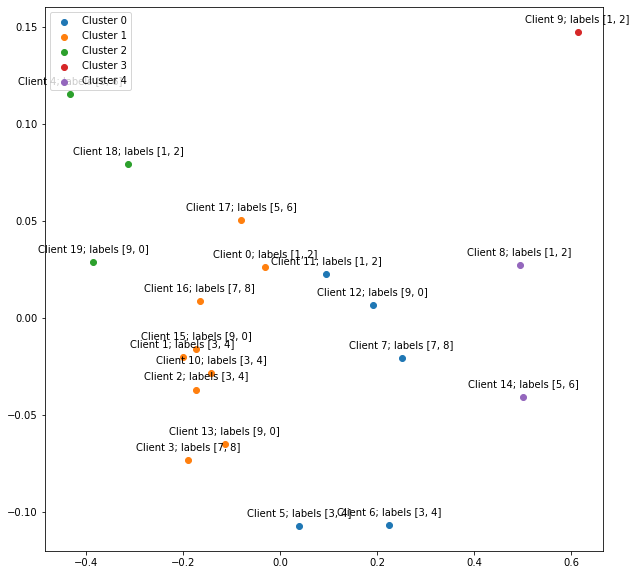

100%|██████████| 10/10 [00:34<00:00,  3.44s/it]


In [4]:
# example single run
cluster_reqirements = {
    "method": "non_cosine",
    "data_type": "gradient_norms",
    "dim_method": "autoencoder",
    "cluster_method": "kmeans"
}
server_cluster = Server(tasks_data_info, tasks_data_idx, cluster_requirements=(v for _,v in cluster_reqirements.items()))
server_cluster.FL_training(sampling_method='cluster', rounds=10)

 90%|█████████ | 9/10 [00:29<00:03,  3.06s/it]

Silhouette score: 0.5430766


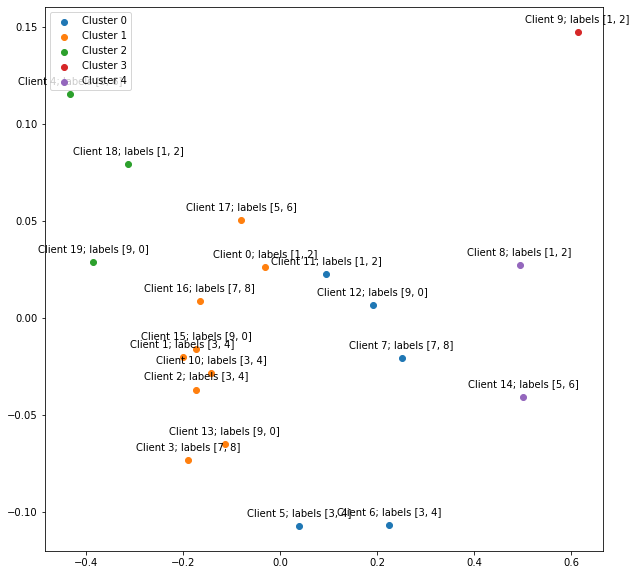

100%|██████████| 10/10 [00:32<00:00,  3.28s/it]


[[9.291861534118652, 8.86784839630127, 5.36860466003418, 4.687939643859863, 4.535770893096924, 4.258613109588623, 3.9742331504821777, 3.8993544578552246, 3.5968399047851562, 3.849491834640503]]


In [3]:
# example multiple runs
cluster_requirements_list = [
    {
        "method": "non_cosine",
        "data_type": "gradient_norms",
        "dim_method": "pca",
        "cluster_method": "kmeans"
    },
    {
        "method": "non_cosine",
        "data_type": "gradient_norms",
        "dim_method": "tsne",
        "cluster_method": "gmm"
    },
    {
        "method": "non_cosine",
        "data_type": "gradient_norms",
        "dim_method": "autoencoder",
        "cluster_method": "kmeans"
    },
]

server_clusters = []
for cluster_reqirements in cluster_requirements_list:
    server_cluster = Server(tasks_data_info, tasks_data_idx, cluster_requirements=(v for _,v in cluster_reqirements.items()))
    server_cluster.FL_training(sampling_method='cluster', rounds=10)
    server_clusters.append({"cluster_reqirements": cluster_reqirements,
                            "cluster": server_cluster})

In [6]:
server_clusters

[{'cluster_reqirements': {'method': 'non_cosine',
   'data_type': 'gradient_norms',
   'dim_method': 'pca',
   'cluster_method': 'kmeans'},
  'cluster': <clustering.server.Server at 0x28fde45e0>},
 {'cluster_reqirements': {'method': 'non_cosine',
   'data_type': 'gradient_norms',
   'dim_method': 'tsne',
   'cluster_method': 'gmm'},
  'cluster': <clustering.server.Server at 0x28fd0af70>},
 {'cluster_reqirements': {'method': 'non_cosine',
   'data_type': 'gradient_norms',
   'dim_method': 'autoencoder',
   'cluster_method': 'kmeans'},
  'cluster': <clustering.server.Server at 0x28e8b3820>}]

In [3]:
cluster_reqirements= {
        "method": "non_cosine",
        "data_type": "gradient_norms",
        "dim_method": "autoencoder",
        "cluster_method": "kmeans"
    }

#server_cluster = Server(tasks_data_info, tasks_data_idx, cluster_requirements=(v for _,v in cluster_reqirements.items()))
#server_cluster.FL_training(sampling_method='cluster', num_clients=50, rounds=80, experiment_num=3)
#server_IS = Server(tasks_data_info, tasks_data_idx)
#server_IS.FL_training(sampling_method='IS', num_clients=50, rounds=80, experiment_num=3)
server_random = Server(tasks_data_info, tasks_data_idx)
server_random.FL_training(sampling_method='random', num_clients=50, rounds=80, experiment_num=3)


server_random.plot_loss()

 86%|████████▋ | 69/80 [05:25<00:52,  4.76s/it]